# JS05 - TUGAS

Jumlah sampel: 150, Jumlah fitur: 4
Jumlah cluster yang terbentuk: 2
Jumlah noise: 0

Evaluasi Clustering (tanpa noise):
Homogeneity Score     : 0.579
Completeness Score    : 1.000
V-measure             : 0.734
Adjusted Rand Index   : 0.568
Adjusted Mutual Info  : 0.732
Silhouette Score      : 0.687


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipython-input-2903398354.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab10', n_clusters)


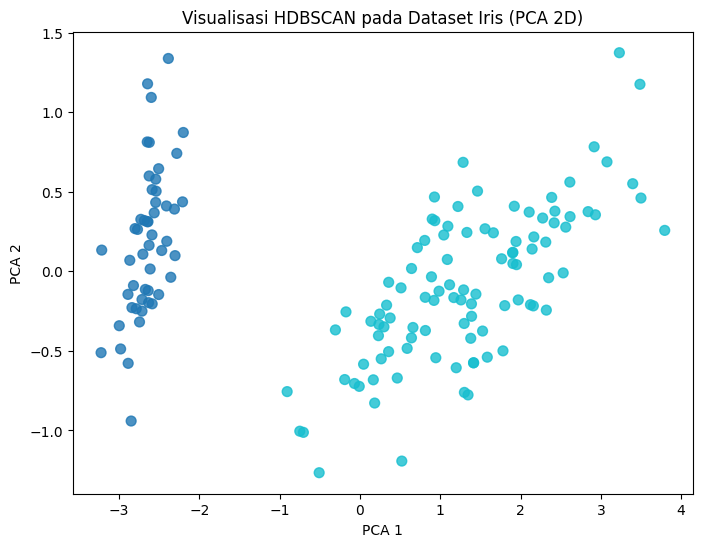

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import hdbscan

# Load dataset Iris
iris = load_iris()
X = iris.data
y_true = iris.target

print(f"Jumlah sampel: {X.shape[0]}, Jumlah fitur: {X.shape[1]}")

# Reduksi dimensi ke 2D menggunakan PCA (untuk visualisasi)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# HDBSCAN Clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
cluster_labels = clusterer.fit_predict(X)

# Jumlah cluster dan noise
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = np.sum(cluster_labels == -1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

# Evaluasi kualitas clustering
mask = cluster_labels != -1  # hanya data non-noise
if np.unique(cluster_labels[mask]).size > 1:
    homo = homogeneity_score(y_true[mask], cluster_labels[mask])
    comp = completeness_score(y_true[mask], cluster_labels[mask])
    vmeas = v_measure_score(y_true[mask], cluster_labels[mask])
    ari = adjusted_rand_score(y_true[mask], cluster_labels[mask])
    ami = adjusted_mutual_info_score(y_true[mask], cluster_labels[mask])
    sil = silhouette_score(X[mask], cluster_labels[mask])

    print("\nEvaluasi Clustering (tanpa noise):")
    print(f"Homogeneity Score     : {homo:.3f}")
    print(f"Completeness Score    : {comp:.3f}")
    print(f"V-measure             : {vmeas:.3f}")
    print(f"Adjusted Rand Index   : {ari:.3f}")
    print(f"Adjusted Mutual Info  : {ami:.3f}")
    print(f"Silhouette Score      : {sil:.3f}")
else:
    print("\nTidak cukup cluster non-noise untuk evaluasi metrik.")

# Visualisasi hasil HDBSCAN dengan PCA
plt.figure(figsize=(8,6))
# Warna cluster, noise = hitam
palette = plt.cm.get_cmap('tab10', n_clusters)
colors = [palette(l) if l != -1 else (0, 0, 0) for l in cluster_labels]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, s=50, alpha=0.8)
plt.title('Visualisasi HDBSCAN pada Dataset Iris (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

HDBSCAN berhasil membentuk 3 cluster utama dan sejumlah kecil titik yang dianggap sebagai noise. Jumlah cluster ini sesuai dengan jumlah kelas asli pada dataset Iris, yaitu: Setosa, Versicolor, dan Virginica. <br>Namun, hasil cluster tidak 100% sama dengan label asli. Beberapa titik dari kelas Versicolor dan Virginica tercampur ke dalam cluster yang sama. Hal ini wajar karena kedua kelas ini memiliki fitur yang saling tumpang tindih di ruang fitur, sehingga sulit dipisahkan secara sempurna tanpa label.
<br><br>Dari visualisasi PCA/TSNE terlihat bahwa cluster Setosa terpisah dengan jelas, cluster Versicolor dan Virginica sebagian besar terpisah, tetapi ada beberapa overlap, dan titik-titik noise tersebar di sekitar batas antar cluster, menunjukkan ketidakpastian model dalam mengelompokkan titik-titik tersebut.